In [1]:
import torch
import numpy
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
n_points = 5

In [3]:
grid = numpy.linspace(-torch.pi / 2, torch.pi / 2, n_points)
grid_x, grid_y = numpy.meshgrid(grid, grid, indexing="ij")

In [4]:
h_1 = h_2 = grid[1] - grid[0]

In [5]:
def phi(X, Y, h1, h2, i, j, n_x, n_y):
    tx = numpy.linspace(X.min(), X.max(), n_x)
    ty = numpy.linspace(Y.min(), Y.max(), n_y)
    xx, yy = numpy.meshgrid(tx, ty, indexing="ij")
    xm = xx.min()
    ym = yy.min()
    xx = xx - ym
    yy = yy - ym
    tmp = numpy.zeros(xx.shape)
    S1 = (
        (i <= xx / h1)
        & (xx / h1 <= i + 1)
        & (j <= yy / h2)
        & (yy / h2 <= j + 1)
        & (yy / h2 - j >= xx / h1 - i)
    )
    tmp[S1] = (j + 1 - yy / h2)[S1]
    S2 = (
        (i - 1 <= xx / h1)
        & (xx / h1 <= i)
        & (j <= yy / h2)
        & (yy / h2 <= j + 1)
        & (yy / h2 - j <= 1 + xx / h1 - i)
    )
    tmp[S2] = (1 + xx / h1 - yy / h2 - i + j)[S2]
    S3 = (
        (i - 1 <= xx / h1)
        & (xx / h1 <= i)
        & (j - 1 <= yy / h2)
        & (yy / h2 <= j)
        & (yy / h2 - j >= xx / h1 - i)
    )
    tmp[S3] = (1 + xx / h1 - i)[S3]
    S4 = (
        (i - 1 <= xx / h1)
        & (xx / h1 <= i)
        & (j - 1 <= yy / h2)
        & (yy / h2 <= j)
        & (yy / h2 - j <= xx / h1 - i)
    )
    tmp[S4] = (1 + yy / h2 - j)[S4]
    S5 = (
        (i <= xx / h1)
        & (xx / h1 <= i + 1)
        & (j - 1 <= yy / h2)
        & (yy / h2 <= j)
        & (yy / h2 - j >= xx / h1 - i - 1)
    )
    tmp[S5] = (1 - xx / h1 + yy / h2 + i - j)[S5]
    S6 = (
        (i <= xx / h1)
        & (xx / h1 <= i + 1)
        & (j <= yy / h2)
        & (yy / h2 <= j + 1)
        & (yy / h2 - j <= xx / h1 - i)
    )
    tmp[S6] = (1 - xx / h1 + i)[S6]
    return tmp

In [6]:
t = torch.linspace(grid[0], grid[-1], 100)
(
    xx,
    yy,
) = torch.meshgrid(t, t, indexing="ij")
zz = torch.zeros_like(xx)

zz += phi(t, t, h_1, h_2, 2, 2, 100, 100)

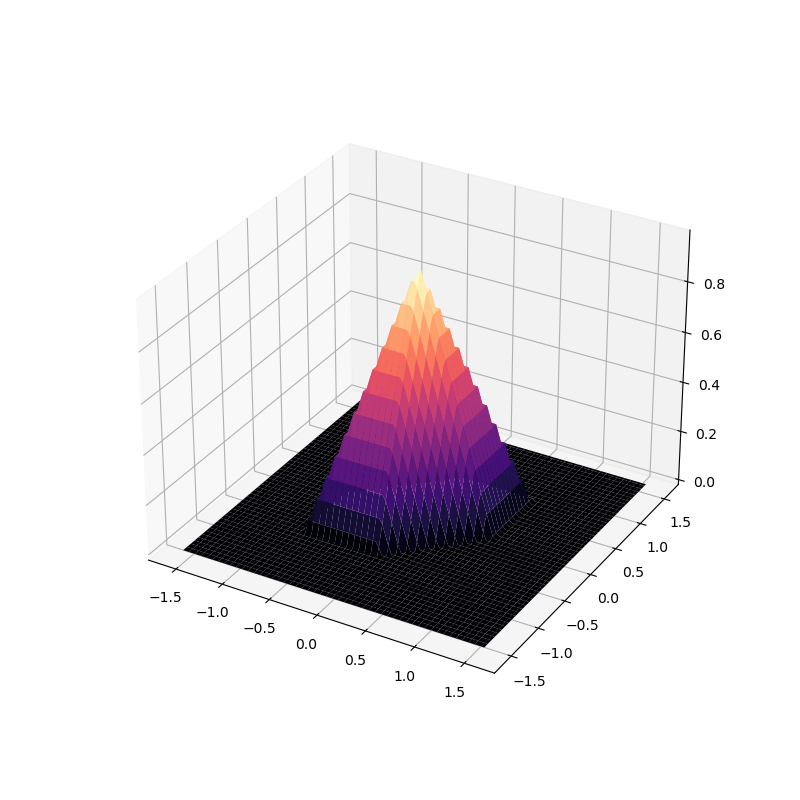

In [7]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.plot_surface(xx, yy, zz, cmap="magma")
plt.show()